# A Brief Introduction to Matplotlib
### Powered by Pandas!

In this notebook, we will cover the basics of Matplotlib, a powerful library 
for visualizing data of all kinds. Used under the hood by dozens of packages, like Pandas, it is an essential part of the data analysis workflow.

In [239]:
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt

# This is equivalent: 
#from matplotlib import pyplot as plt
matplotlib.rcParams['axes.formatter.useoffset'] = False

Let's start with a simple bar chart.

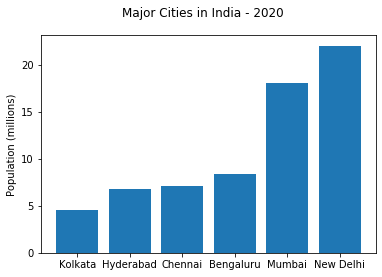

In [224]:
city_names = ['Kolkata', 'Hyderabad','Chennai','Bengaluru', 'Mumbai', 'New Delhi']
city_populations = [4.5,6.8,7.1, 8.4, 18, 22]

plt.bar(city_names, city_populations)

plt.ylabel('Population (millions)')
plt.suptitle('Major Cities in India - 2020')

plt.show()

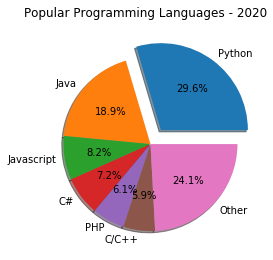

In [225]:
# Source: http://pypl.github.io/PYPL.html
languages = ['Python', 'Java', 'Javascript', 'C#', 'PHP', 'C/C++', 'Other']
share = [29.72, 19.03, 8.2, 7.28, 6.09, 5.91, 24.27]
explode = (0.2, 0, 0, 0, 0, 0, 0)
plt.pie(share, explode=explode, shadow=True, labels=languages, autopct='%1.1f%%')
plt.suptitle('Popular Programming Languages - 2020')
plt.show()

Text(0.5, 1.0, 'Average Weight of Teenagers in the US')

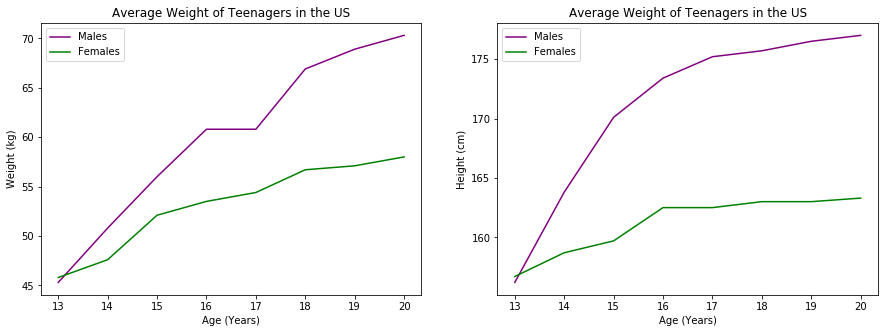

In [226]:
# Data: weight of teenagers in the US
# Source: https://www.disabled-world.com/calculators-charts/height-weight-teens.php
age = [13, 14, 15, 16, 17, 18, 19, 20]
male_weight = [45.3, 50.8, 56.0, 60.8, 60.8, 66.9, 68.9, 70.3]
female_weight = [45.8, 47.6, 52.1, 53.5, 54.4, 56.7, 57.1, 58.0]
male_height = [156.2, 163.8, 170.1, 173.4, 175.2, 175.7, 176.5, 177]
female_height = [156.7, 158.7, 159.7, 162.5, 162.5, 163, 163, 163.3]

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

axs[0].plot(age, male_weight, label="Males", color="purple")
axs[0].plot(age, female_weight, label="Females", color="green")

axs[0].set_xlabel('Age (Years)')
axs[0].set_ylabel('Weight (kg)')
axs[0].legend()
axs[0].set_title('Average Weight of Teenagers in the US')

axs[1].plot(age, male_height, label="Males", color="purple")
axs[1].plot(age, female_height, label="Females", color="green")

axs[1].set_xlabel('Age (Years)')
axs[1].set_ylabel('Height (cm)')
axs[1].legend()
axs[1].set_title('Average Weight of Teenagers in the US')

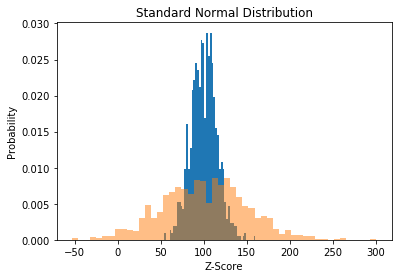

In [278]:
import numpy as np
np.random.seed(543210)

ax = plt.subplot()

bins = 50
size = 1000

# Mean of the distribution
mu = 100

# Standard deviation of the distribution
sigma1 = 15
sigma2 = 50

# Example data
norm_data = np.random.randn(size)
x1 = mu + sigma1 * norm_data
x2 = mu + sigma2 * norm_data

# Drawing order matters
ax.hist(x1, bins=bins, density=1)
ax.hist(x2, bins=bins, alpha=0.5, density=1)


ax.set_ylabel("Probability")
ax.set_xlabel("Z-Score")
ax.set_title("Standard Normal Distribution")
plt.show()

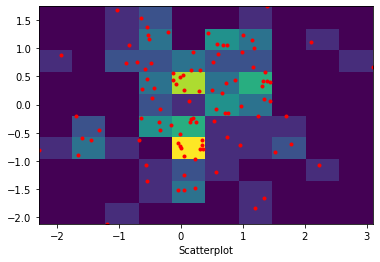

In [227]:
np.random.seed(54321)
# fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(8, 8))
ax = plt.subplot()

size = 100 
norm_data = np.random.randn(2, size)

ax.hist2d(norm_data[0], norm_data[1])
ax.set_xlabel("2D Histogram")
ax.scatter(norm_data[0], norm_data[1], marker=".", color="red")
ax.set_xlabel("Scatterplot")

plt.show()

### Exercise - Separate the 2D histogram and the scatterplot into two separate plots

In [180]:
# Import the data
em_filepath = './data/emission_data.csv'
# Set the index to the country names
em_data = pd.read_csv(em_filepath, index_col=0)

# em_data.head()
# em_data.info()
# em_data.describe()

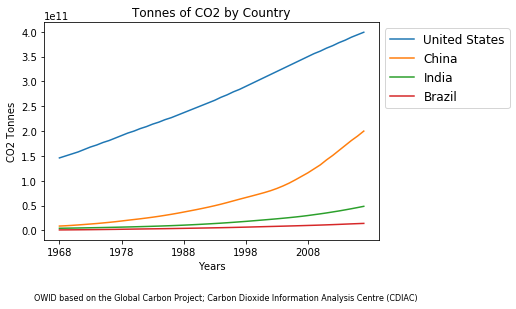

In [280]:
# Get set of years
set_years = em_data.columns[-50:]
# Select those years from dataframe
em_data_set = em_data.filter(items=set_years)

# Get country data
# United States
us_em = em_data_set.loc["United States"]

# China
china_em = em_data_set.loc["China"]

# India
india_em = em_data_set.loc["India"]

# Brazil
brazil_em = em_data_set.loc["Brazil"]

fig, ax = plt.subplots()

ax.plot(us_em, label="United States")
ax.plot(china_em, label="China")
ax.plot(india_em, label="India")
ax.plot(brazil_em, label="Brazil")

# countries = ["United States", "China", "India", "Brazil"]
# for country in countries:
#     country_em = em_data_set.loc[country]
#     ax.plot(country_em, label=country)

if (len(set_years) > 10):
    set_years_num = [int(year) for year in set_years]
    set_years_limited = np.arange(min(set_years_num), max(set_years_num), 10)
    set_years_limited_string = [str(year) for year in set_years_limited]
    ax.set_xticks(set_years_limited_string)


# Add a legend
ax.legend(bbox_to_anchor=(1, 1), prop={'size': 12})

# Add axis information
ax.set_xlabel('Years')
ax.set_ylabel('CO2 Tonnes')
ax.set_title('Tonnes of CO2 by Country')
ax.annotate('OWID based on the Global Carbon Project; Carbon Dioxide Information Analysis Centre (CDIAC)', (0,0), (-10,-60), fontsize=8, 
             xycoords='axes fraction', textcoords='offset points')

# plt.style.use('fivethirtyeight')

# plt.tight_layout()

filepath = './out/co2_per_capita'
# fig.savefig(filepath + '.png')
# fig.savefig(filepath + '.jpg')
# fig.savefig(filepath + '.svg')

plt.show()

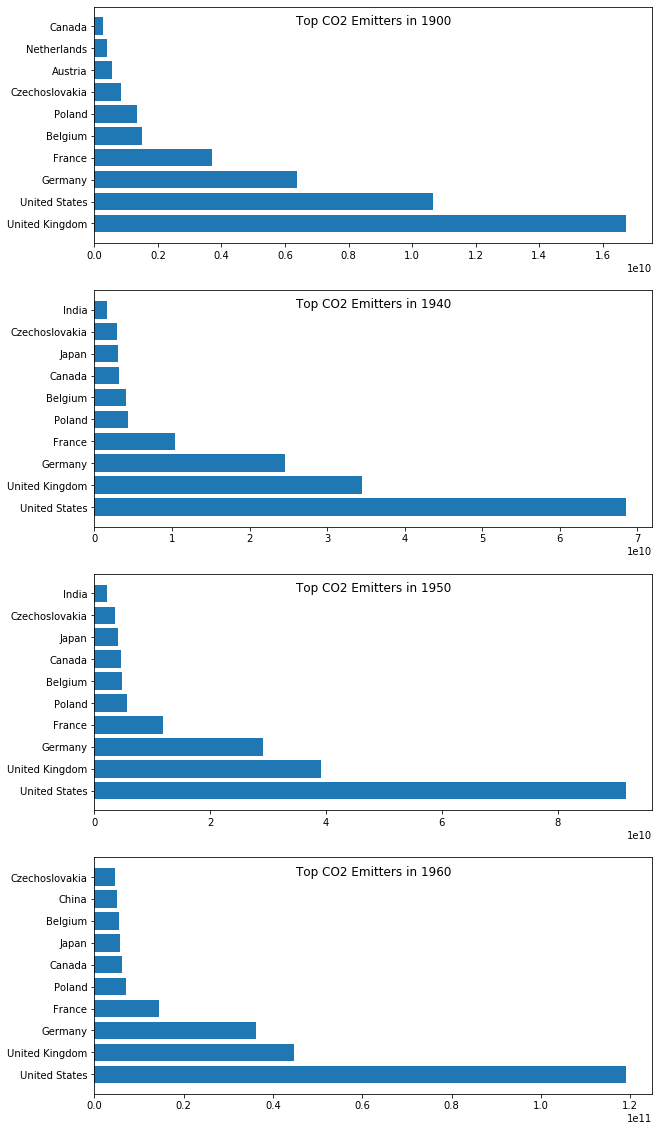

In [229]:
def generate_bar_by_years(data, years, num_countries=5, drop_rows = None, ext='.png'):
    '''
    Generates image of top n countries
    '''
    num_years = len(years)
    fig_height = num_years * 5
    fig, axs = plt.subplots(nrows=num_years, ncols=1, figsize=(10,fig_height))
    for i, year in enumerate(years):
        ax = axs[i]
        data_by_year = data[year].sort_values(ascending=False)
        if drop_rows:
            # Drop region data
            data_by_year = data_by_year.drop(drop_rows)            

        top_emitters = data_by_year.head(num_countries)
        # Get bar plot values
        country_values = top_emitters.values
        # Get bar plot labels
        country_names = top_emitters.index.to_list()
    
        # Use standard matplotlib
        ax.barh(country_names, country_values)
        # Or use pandas!
        # top_emitters.plot(ax=ax, kind='barh')
        title = 'Top CO2 Emitters in ' + year
        ax.set_title(title, y=0.9)
        
#         prefix = './out/'
#         filename = 'top_emitters_' + year
#         filepath = prefix + filename + ext
#         plt.savefig(filepath)

years = ['1900', '1940', '1950', '1960']
drop_rows = ['World', 'EU-28', 'Asia and Pacific (other)', 'Europe (other)', 
             'Americas (other)', 'Middle East', 'Africa']
num_countries = 10
generate_bar_by_years(em_data, years, num_countries, drop_rows)


